<a href="https://colab.research.google.com/github/JomarQr/Artificial-Intelligence-path/blob/main/Inverse_kinematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Improve the robot that we were doing during the class

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.animation import FuncAnimation
import random
import os

In [ ]:
def lawOfCosine(x,y,l1,l2):
    return (x**2 + y**2 - l1**2 - l2**2) / (2 * l1 * l2)

In [ ]:
class Robot:
    def __init__(self,l1,l2,theta):
        self.l1 = l1
        self.l2 = l2
        self.T = self.FK(theta)
        self.trajPoints = []

    def FK(self,theta):
        x1 = self.l1 * math.cos(theta[0])
        y1 = self.l1 * math.sin(theta[0])
        x2 = x1 + self.l2 * math.cos(theta[0] + theta[1])
        y2 = y1 + self.l2 * math.sin(theta[0] + theta[1])
        self.T = [(x1,y1),(x2,y2)]
        return self.T

    def IK(self,x,y):
        theta = [0,0]
        d = math.sqrt(x**2 + y**2)
        if d > (self.l1 + self.l2):
            return None
        cos_theta2 = lawOfCosine(x,y,self.l1,self.l2)
        theta[1] = math.acos(cos_theta2)
        k1 = self.l1 +self.l2 * math.cos(theta[1])
        k2 = self.l2 * math.sin(theta[1])
        theta[0] = math.atan2(y, x) - math.atan2(k2, k1)
        return theta

    def generateCircleTraj(self,n,r):
        self.trajPoints = []
        x0 = self.T[1][0] - r
        y0 = self.T[1][1]
        for i in range(n):
            theta = 2 * math.pi * i / n
            x = x0 + r * math.cos(theta)
            y = y0 + r * math.sin(theta)
            self.trajPoints.append((x, y))
        print("self.trajPoints:", self.trajPoints)

    def generateRandomTraj(self,n):
        self.trajPoints = []
        lim = (self.l1 + self.l2)*math.cos(math.pi/4)
        self.trainInput = np.zeros((n,2))
        self.trainOutput = np.zeros((n,2))
        for i in range(n):
            x = random.uniform(0, lim)
            y = random.uniform(-lim, lim)
            self.trajPoints.append((x,y))
            self.trainInput[i,:] = [x,y]
            theta = self.IK(x,y)
            self.trainOutput[i,:] = [theta[0],theta[1]]


    def animateRobot(self):
        fig, ax = plt.subplots()
        lim = (self.l1 + self.l2)*1.1
        ax.set_xlim(-lim, lim)
        ax.set_ylim(-lim, lim)
        self.line1, = ax.plot([0,self.T[0][0]], [0,self.T[0][1]], 'bo-')
        self.line2, = ax.plot([self.T[0][0],self.T[1][0]], [self.T[0][1],self.T[1][1]], 'bo-')
        if self.trajPoints:  # Check if it's not empty
          traj_x, traj_y = zip(*self.trajPoints)
          traj_x = list(traj_x)
          traj_y = list(traj_y)
        else:
          traj_x, traj_y = [], []
        ax.plot(traj_x, traj_y, 'r.')  # Desired trajectory
        plt.show()

In [ ]:
def drawInitialPose(T):
    adr = Robot(1,1,T)
    adr.animateRobot()

def drawCircle():
    adr = Robot(1,1,[np.pi/4,-np.pi/2])
    adr.generateCircleTraj(100,.5)
    adr.animateRobot()

def drawRandomTraj():
    adr = Robot(1,1,[np.pi/4,-np.pi/2])
    adr.generateRandomTraj(1000)
    adr.animateRobot()

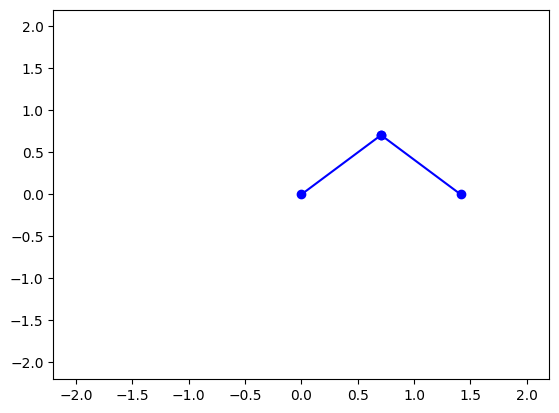

In [ ]:
drawInitialPose([np.pi/4,-np.pi/2])

self.trajPoints: [(1.4142135623730951, 0.0), (1.4132269265872308, 0.03139525976465669), (1.4102709130303341, 0.06266661678215213), (1.4053571877374396, 0.0936906572928623), (1.3985051429374107, 0.1243449435824274), (1.389741820520672, 0.1545084971874737), (1.3791018053172208, 0.18406227634233896), (1.366627088606105, 0.21288964578253633), (1.3523669023950269, 0.24087683705085766), (1.3363775251241026, 0.26791339748949833), (1.3187220595605689, 0.29389262614623657), (1.2994701837609899, 0.3187119948743448), (1.2786978760838008, 0.3422735529643443), (1.2564871153374395, 0.3644843137107058), (1.23292555724744, 0.3852566213878946), (1.2081061885193318, 0.40450849718747367), (1.1821269598625934, 0.42216396275100754), (1.1550903994239528, 0.43815334002193185), (1.1271032081556314, 0.4524135262330098), (1.098275838715434, 0.4648882429441257), (1.0687220595605689, 0.47552825814757677), (1.0385585059555225, 0.48429158056431554), (1.0079042196659576, 0.4911436253643443), (0.9768801791552474, 0.4

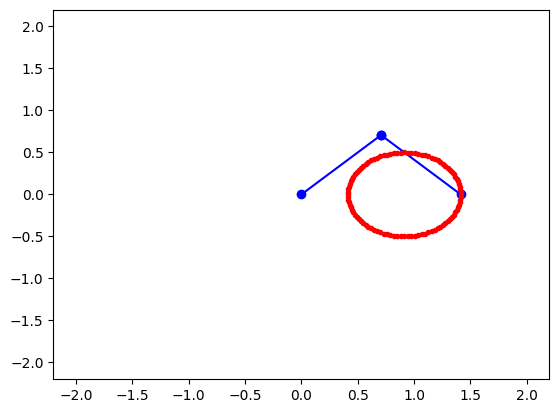

In [ ]:
drawCircle()

### Task 1.
1. Modify `animateRobot` function so that it would display a few more (e.g. 4) snapshots of robotic arm that are drawing the circle. Optional: pass the number of snapshots as a parameter to the function.
2. Make that robotic arm draw a square.
3. Add the third join to the Robot, figure out forward and inverse kinematic equations for that one. Write a new class Robot3.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [ ]:
def lawOfCosine(x, y, l1, l2):
    return (x**2 + y**2 - l1**2 - l2**2) / (2 * l1 * l2)

In [ ]:
class Robot:
    def __init__(self, l1, l2, theta):
        self.l1 = l1
        self.l2 = l2
        self.T = self.FK(theta)
        self.trajPoints = []

    def FK(self, theta):
        x1 = self.l1 * math.cos(theta[0])
        y1 = self.l1 * math.sin(theta[0])
        x2 = x1 + self.l2 * math.cos(theta[0] + theta[1])
        y2 = y1 + self.l2 * math.sin(theta[0] + theta[1])
        self.T = [(x1, y1), (x2, y2)]
        return self.T

    def IK(self, x, y):
        theta = [0, 0]
        d = math.sqrt(x**2 + y**2)
        if d > (self.l1 + self.l2):
            return None
        cos_theta2 = lawOfCosine(x, y, self.l1, self.l2)
        theta[1] = math.acos(cos_theta2)
        k1 = self.l1 + self.l2 * math.cos(theta[1])
        k2 = self.l2 * math.sin(theta[1])
        theta[0] = math.atan2(y, x) - math.atan2(k2, k1)
        return theta

    def generateCircleTraj(self, n, r):
        self.trajPoints = []
        x0 = self.T[1][0] - r
        y0 = self.T[1][1]
        for i in range(n):
            theta = 2 * math.pi * i / n
            x = x0 + r * math.cos(theta)
            y = y0 + r * math.sin(theta)
            self.trajPoints.append((x, y))

    def generateSquareTraj(self, n, side_length):

      self.trajPoints = []
      x0, y0 = self.T[1]

      x0 -= side_length / 2
      y0 -= side_length / 2

      step = n // 4

      for i in range(step):
          self.trajPoints.append((x0 + i * side_length / step, y0))  # right
      for i in range(step):
          self.trajPoints.append((x0 + side_length, y0 + i * side_length / step))  # up
      for i in range(step):
          self.trajPoints.append((x0 + side_length - i * side_length / step, y0 + side_length))  # left
      for i in range(step):
          self.trajPoints.append((x0, y0 + side_length - i * side_length / step))  # down

      self.trajPoints.append((x0, y0))

      self.trajPoints = [p for p in self.trajPoints if self.IK(p[0], p[1]) is not None]



    def animateRobot(self, snapshots=5):
        fig, ax = plt.subplots()
        lim = (self.l1 + self.l2) * 1.1
        ax.set_xlim(-lim, lim)
        ax.set_ylim(-lim, lim)

        if self.trajPoints:
            traj_x, traj_y = zip(*self.trajPoints)
            ax.plot(traj_x, traj_y, 'r.')  # Desired trajectory
        else:
            print("Warning: No trajectory generated before animation.")
            traj_x, traj_y = [], []

        for i in range(snapshots):
            if not self.trajPoints:
                break
            index = i * len(self.trajPoints) // snapshots
            theta = self.IK(*self.trajPoints[index])
            if theta:
                self.FK(theta)
                ax.plot([0, self.T[0][0]], [0, self.T[0][1]], 'bo-')
                ax.plot([self.T[0][0], self.T[1][0]], [self.T[0][1], self.T[1][1]], 'bo-')
        plt.show()

def drawInitialPose(T):
    adr = Robot(1, 1, T)
    adr.generateCircleTraj(100, 0.5)
    adr.animateRobot()

def drawCircle():
    adr = Robot(1, 1, [np.pi/4, -np.pi/2])
    adr.generateCircleTraj(100, 0.5)
    adr.animateRobot()

def drawSquare():
    adr = Robot(1, 1, [np.pi/4, -np.pi/2])
    adr.generateSquareTraj(100, 1)
    adr.animateRobot()






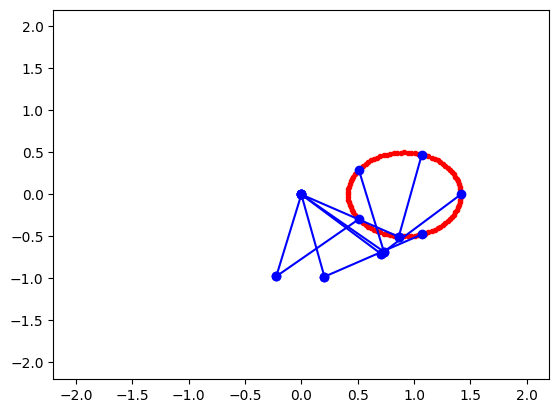

In [ ]:
drawInitialPose([np.pi/4, -np.pi/2])

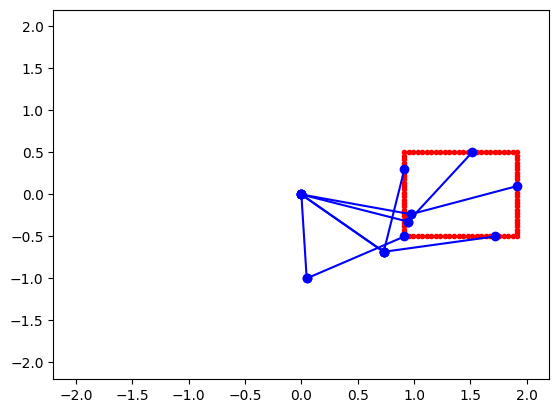

In [ ]:
drawSquare()

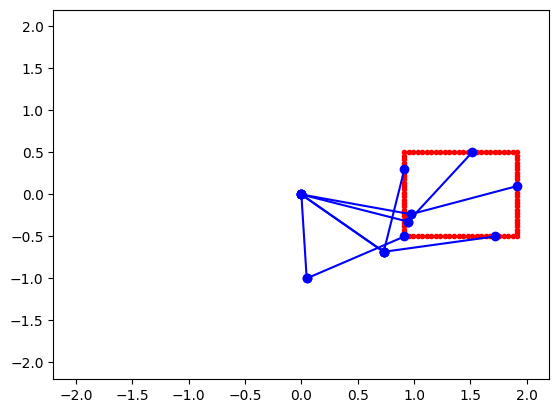

In [ ]:
drawSquare()

### Task 2. Inverse kinematics with ikpy

1. Read the configuration of your robot from `robot.urdl`.
2. Make this robot move to some point few points, save the images.
3. Figure out which points your robot can reach.
4. Draw a square of admissible size with your robot (e.g. by calling `move` function). Save the points to an array and display them in 3D.

Take as an example:
https://github.com/roTechnic/Cheats6DOFInverseKinematics

In [ ]:
!pip install ikpy numpy matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
urdf_path = "/content/drive/My Drive/robot.urdf"

from ikpy.chain import Chain
robot_chain = Chain.from_urdf_file(urdf_path)

In [ ]:
import numpy as np

#3D space (x, y, z)
target_points = [
    [0.2, 0.2, 0.2],
    [0.3, 0.1, 0.2],
    [0.4, 0.2, 0.3],
    [0.3, 0.3, 0.4]
]

joint_angles = []
for point in target_points:
    angles = robot_chain.inverse_kinematics(point)
    joint_angles.append(angles)

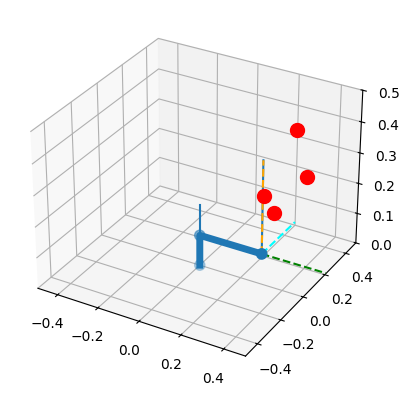

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

robot_chain.plot(robot_chain.inverse_kinematics([0, 0, 0]), ax)

for point in target_points:
    ax.scatter(point[0], point[1], point[2], color='r', s=100)

ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([0, 0.5])

plt.show()

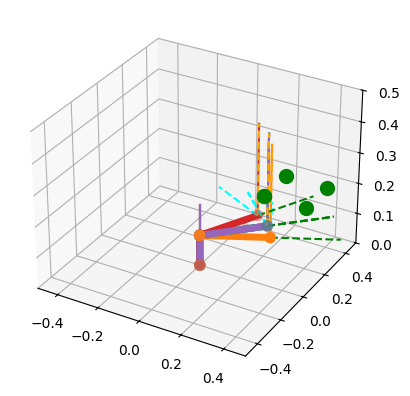

In [ ]:

square_points = [
    [0.2, 0.2, 0.2],
    [0.4, 0.2, 0.2],
    [0.4, 0.4, 0.2],
    [0.2, 0.4, 0.2],
    [0.2, 0.2, 0.2]
]

square_joint_angles = []
for point in square_points:
    angles = robot_chain.inverse_kinematics(point)
    square_joint_angles.append(angles)

# Visualization of the square
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the robot at each point in the square
for angles in square_joint_angles:
    robot_chain.plot(angles, ax)


for point in square_points:
    ax.scatter(point[0], point[1], point[2], color='g', s=100)

# plot limits
ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([0, 0.5])

plt.show()

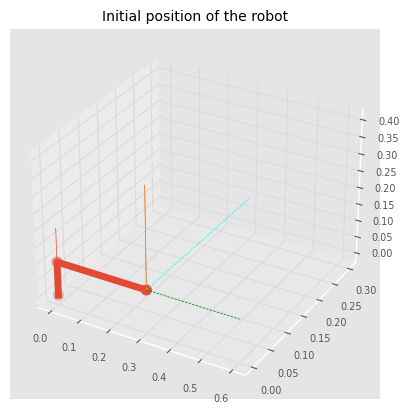

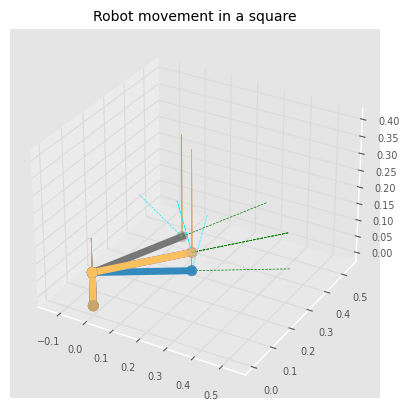

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
robot_chain.plot(robot_chain.inverse_kinematics([0, 0, 0]), ax)
plt.title("Initial position of the robot")
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for angles in square_joint_angles:
    robot_chain.plot(angles, ax)
plt.title("Robot movement in a square")
plt.show()

### Task 3. Inverse kinematics with Robotics Toolbox
Take a look at https://github.com/jhavl/dkt
1. similarly to [the notebook](https://github.com/petercorke/robotics-toolbox-python/blob/master/notebooks/kinematics.ipynb) investigate 2 other predefined robot [models](https://petercorke.github.io/robotics-toolbox-python/arm_models.html) .
2. Optional. define your own model with ETS, try out forward and inverse kinematics on it.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/220.6 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 29.0 MB/s eta 0:00:00
  Created wheel for roboticstoolbox-python: filename=roboticstoolbox_p

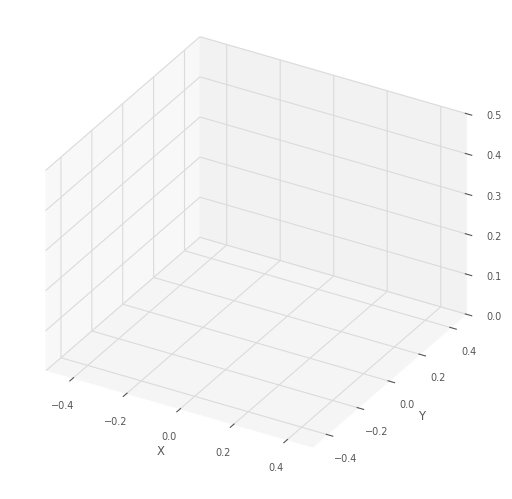

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

exploring UR5
DHRobot: UR5 (by Universal Robotics), 6 joints (RRRRRR), dynamics, standard DH parameters
┌─────┬─────────┬─────────┬────────┐
│ θⱼ  │   dⱼ    │   aⱼ    │   ⍺ⱼ   │
├─────┼─────────┼─────────┼────────┤
│  q1 │ 0.08946 │       0 │  90.0° │
│  q2 │       0 │  -0.425 │   0.0° │
│  q3 │       0 │ -0.3922 │   0.0° │
│  q4 │  0.1091 │       0 │  90.0° │
│  q5 │ 0.09465 │       0 │ -90.0° │
│  q6 │  0.0823 │       0 │   0.0° │
└─────┴─────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬───────┬─────┬─────┬─────┬──────┬─────┐
│ name │ q0    │ q1  │ q2  │ q3  │ q4   │ q5  │
├──────┼───────┼─────┼─────┼─────┼──────┼─────┤
│   qr │  180° │  0° │  0° │  0° │  90° │  0° │
│   qz │  0°   │  0° │  0° │  0° │  0°  │  0° │
└──────┴───────┴─────┴─────┴─────┴──────┴─────┘

Direct kinematic position (FK) in qz: 
   1         0         0        -0.8173    
   0         0        -1        -0.1915    
   0         1         0        -0.005191  
   0         0         0         1         

Inv

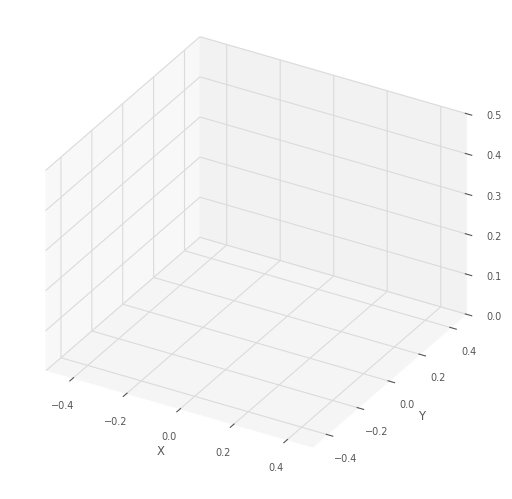

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Custom FK Robot:    0.7071   -0.7071    0         1         
   0.7071    0.7071    0         0         
   0         0         1         1         
   0         0         0         1         

Custom IK Robot: [0.78539851]


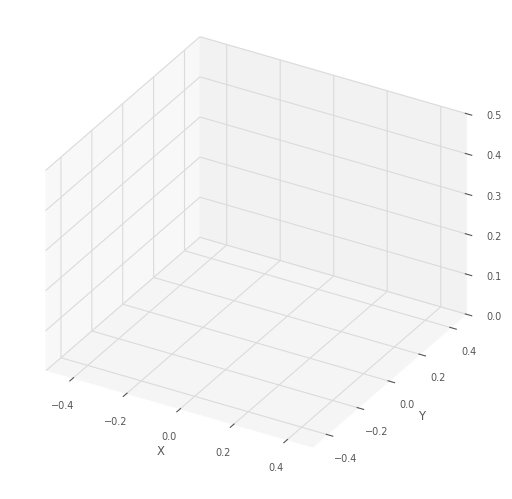

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.ion()

!pip install roboticstoolbox-python
!pip install spatialmath-python

import numpy as np
import roboticstoolbox as rtb
from spatialmath import SE3
import matplotlib.pyplot as plt

robots = ['Panda', 'UR5']

for robot_name in robots:
    print(f"exploring {robot_name}")
    robot = rtb.models.DH.__dict__[robot_name]()
    print(robot)

    qz = robot.qz
    T = robot.fkine(qz)
    print(f"Direct kinematic position (FK) in qz: \n{T}")

    ik_solution = robot.ikine_LM(T)
    print(f"Inverse kinematic solution (IK): \n{ik_solution.q}")

    robot.plot(qz, block=True)
    plt.show()

ets = rtb.ETS([rtb.ET.tx(1), rtb.ET.tz(1), rtb.ET.Rz()])
custom_robot = rtb.ERobot(ets)

q_custom = [np.pi/4]
T_custom = custom_robot.fkine(q_custom)
print("Custom FK Robot:", T_custom)

ik_custom = custom_robot.ikine_LM(T_custom)
print("Custom IK Robot:", ik_custom.q)

custom_robot.plot(q_custom, block=True)
plt.show()
